In [47]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sdss.metadata import MetaData
meta = MetaData()
%matplotlib inline

In [72]:
meta_data_directory = "/home/edgar/spectra/0_01_z_0_5_4_0_snr_inf"
scores_directory = f"{meta_data_directory}/bin_04/explanation/256_128_64/latent_12"
wave = np.load(f"{meta_data_directory}/wave.npy")

In [88]:
scores_names = {
    "correlation": "Correlation score",
    "correlation_filter_250kms": "Correlation score with a 250 kms filter",
    "cosine": "Cosine disimilarity score",
    "cosine_filter_250kms": "Cosine disimilarity score with a 250 kms filter",
    "lp_noRel100": "lp score",
    "lp_filter_250kms_noRel100": "lp score with a 250 kms filter",
    "lp_noRel97": "lp score ignoring 3\% of largest residuals",
    "lp_filter_250kms_noRel97": "lp score ignoring 3\% of largest residuals \n with a 250 kms filter",
    "lp_rel100": "lp relative score",
    "lp_filter_250kms_rel100": "lp relative score with a 250 kms filter",
    "lp_rel97": "lp relative score\n ignoring 3\% of largest residuals",
    "lp_filter_250kms_rel97": "lp relative score\n ignoring 3\% of largest residuals \n with a 250 kms filter"
}
scores = {}
df_scores = {}

for metric in scores_names.keys():
    
    scores[metric] = np.load(
        f"{scores_directory}/{metric}/top_anomalies.npy",
        mmap_mode="r"
    )

    df_scores[metric] = pd.read_csv(
        f"{scores_directory}/{metric}/top_anomalies.csv.gz",
        index_col="specobjid",
    )

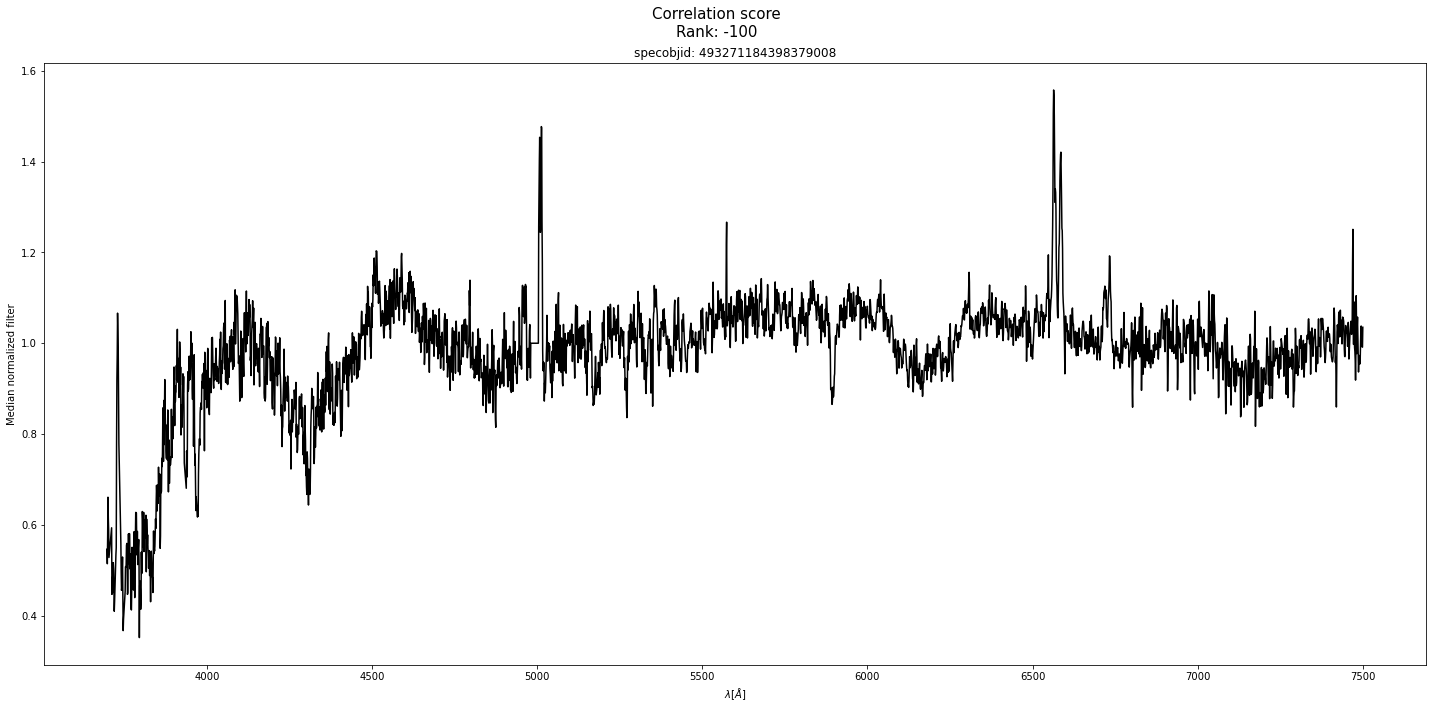

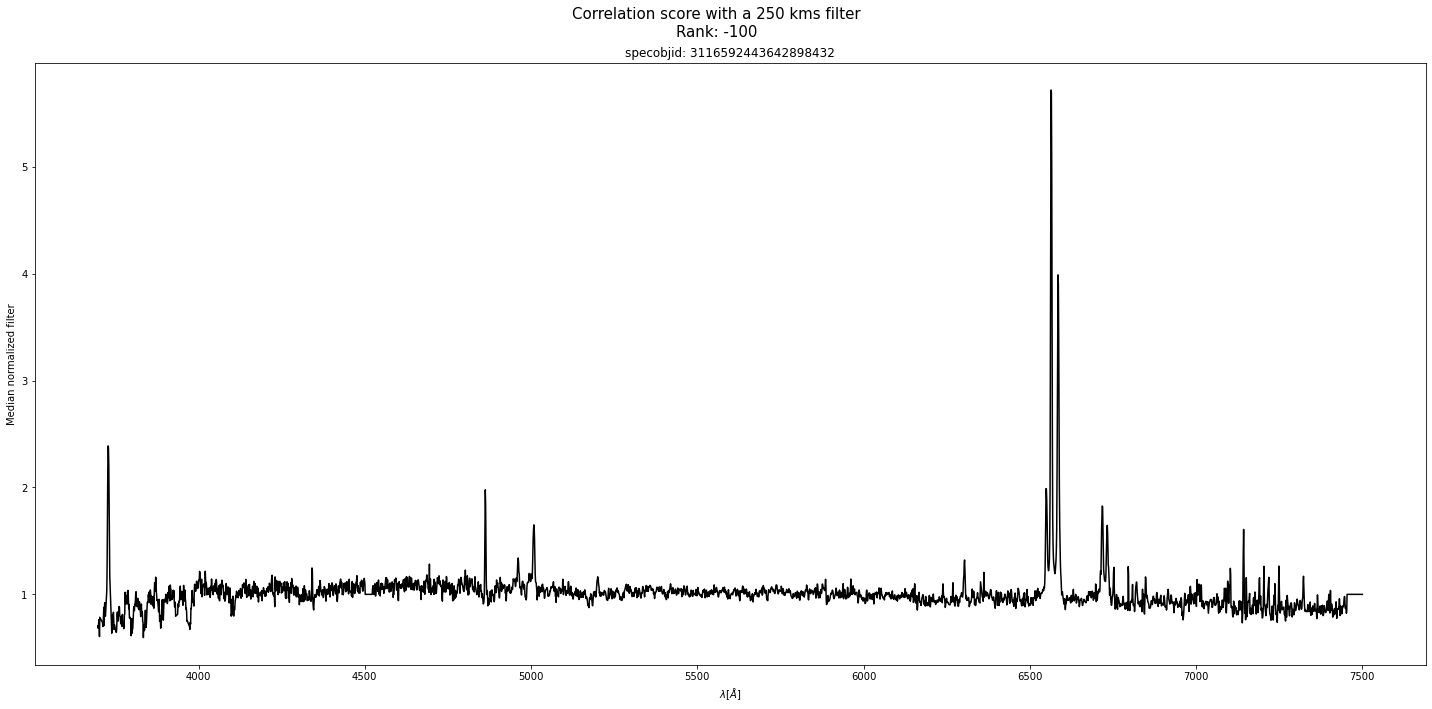

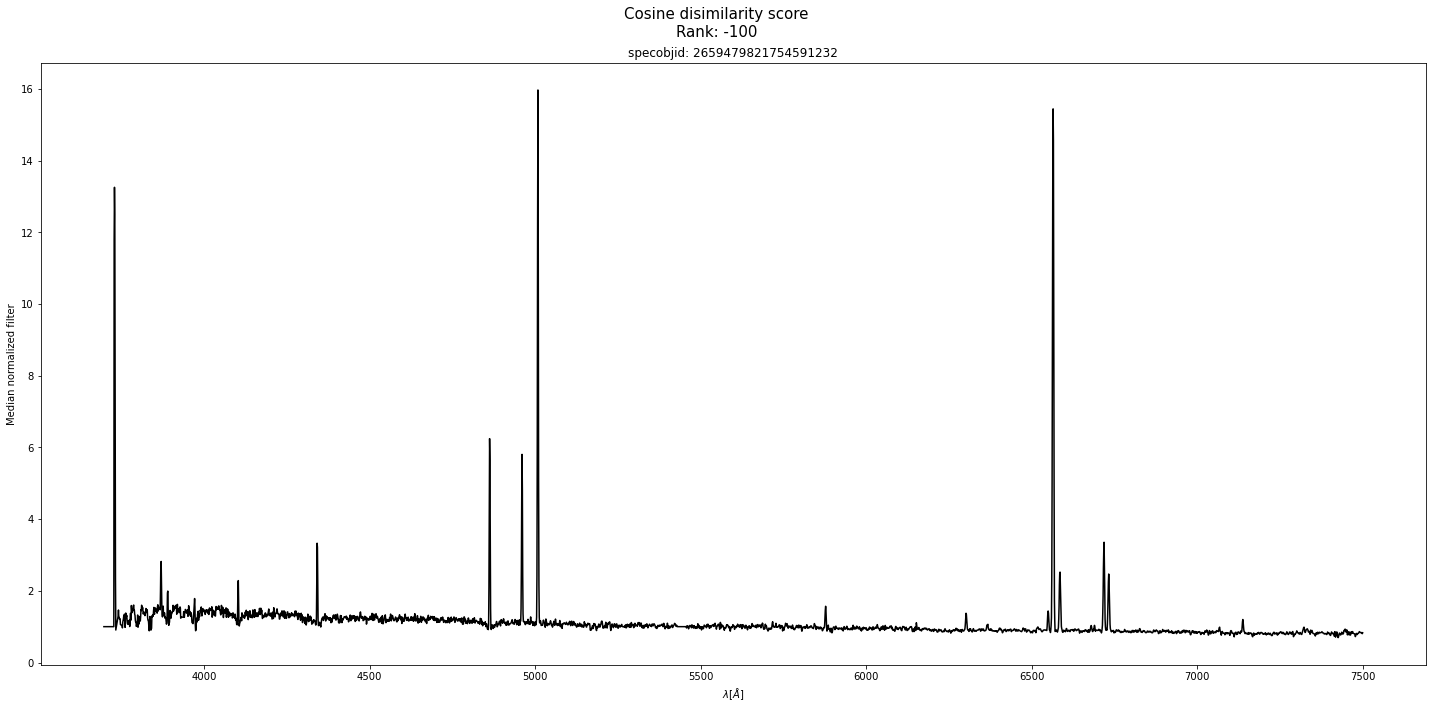

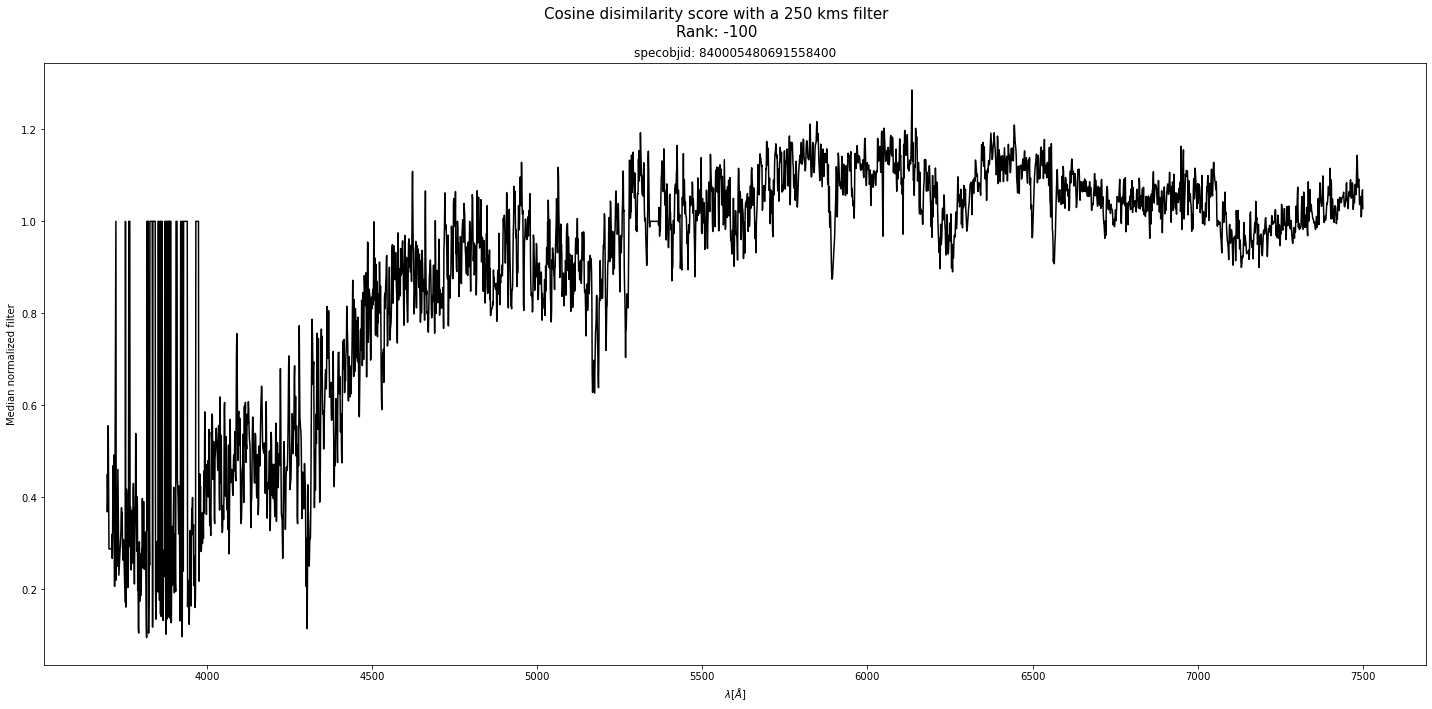

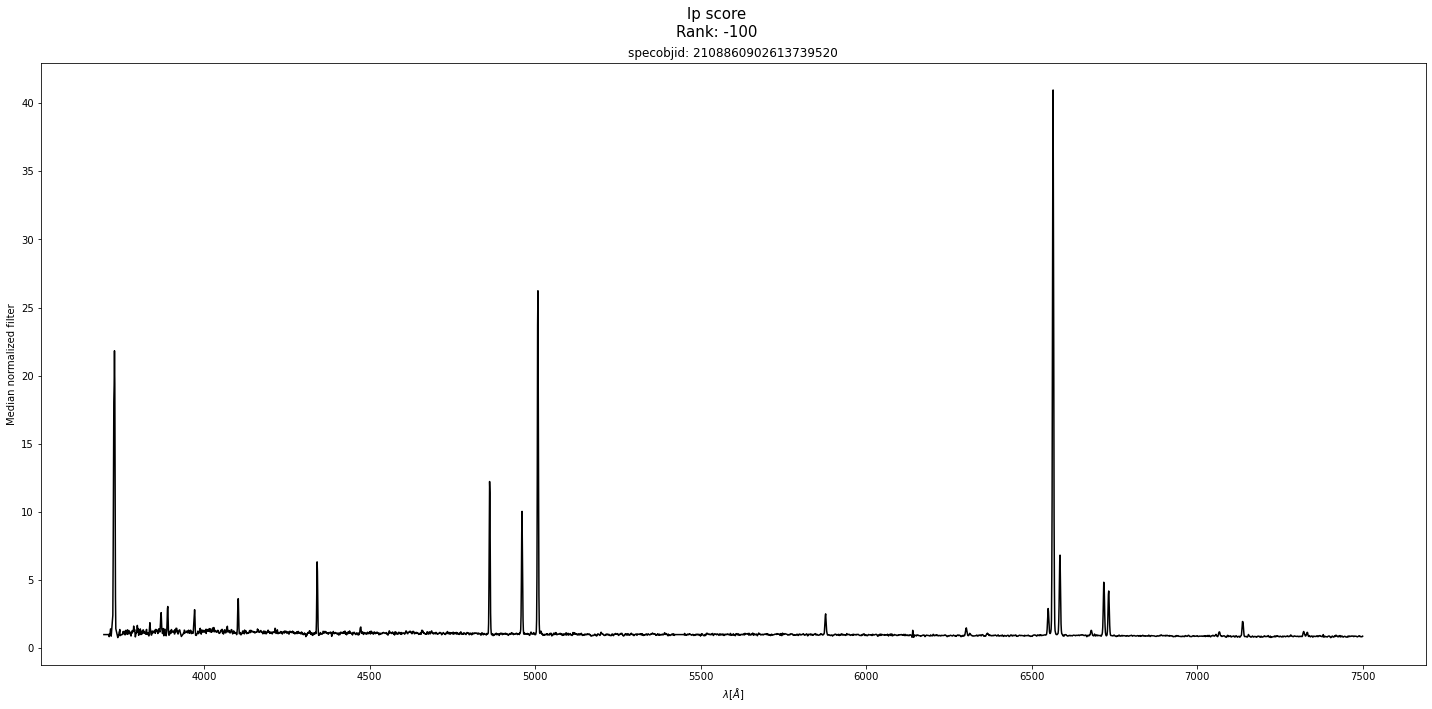

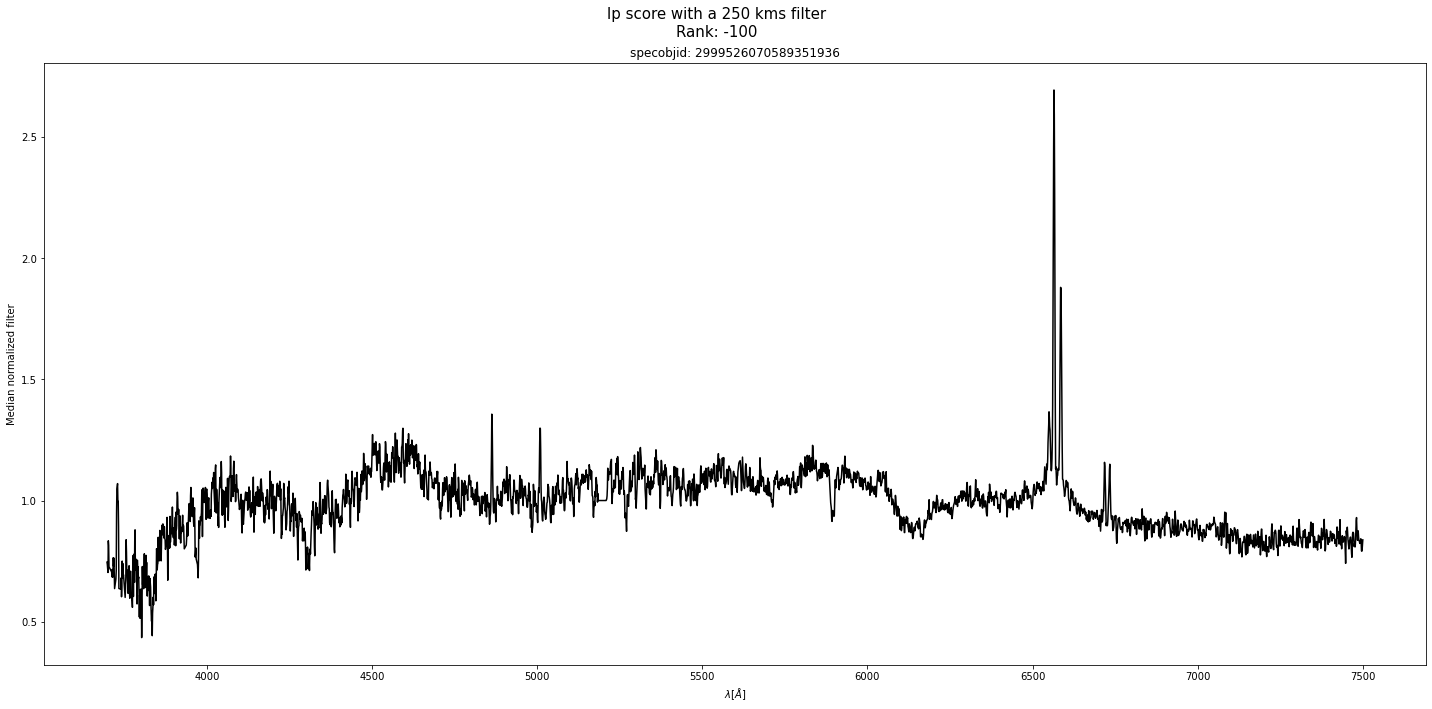

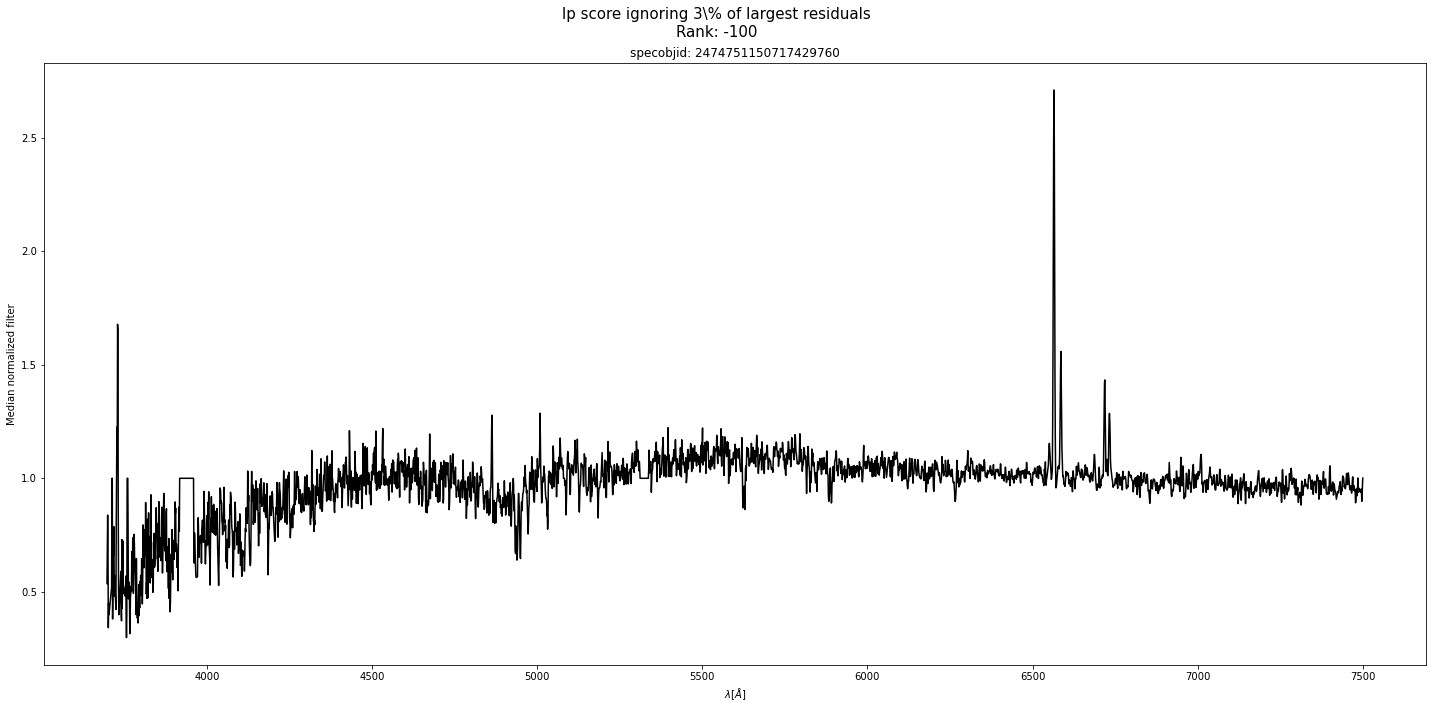

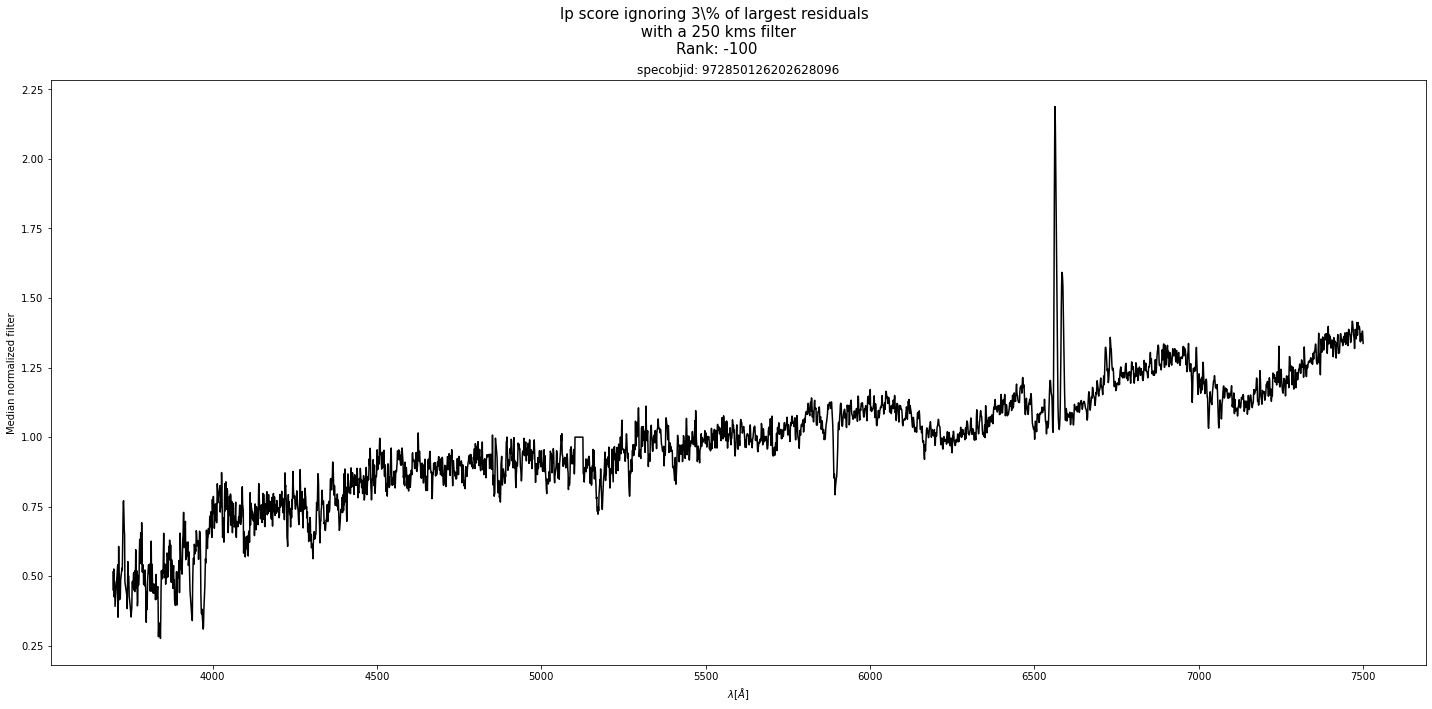

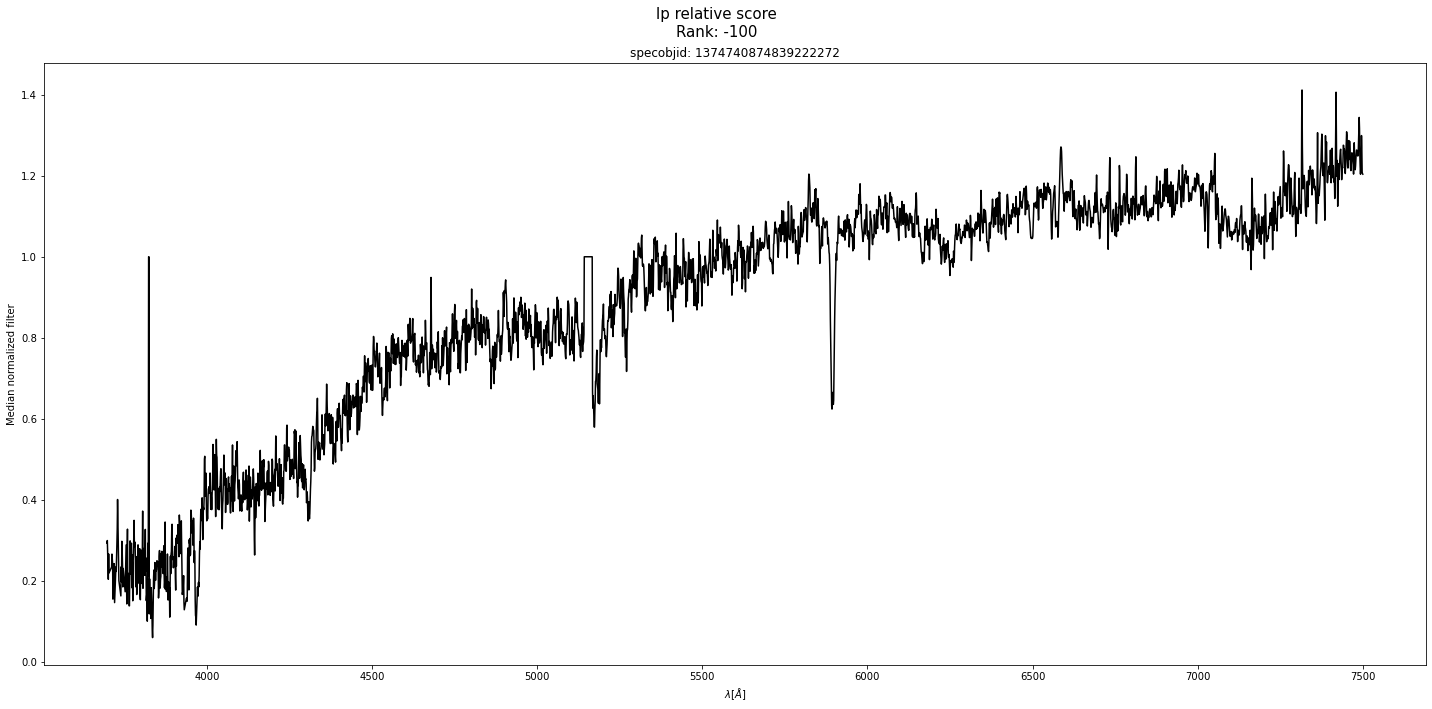

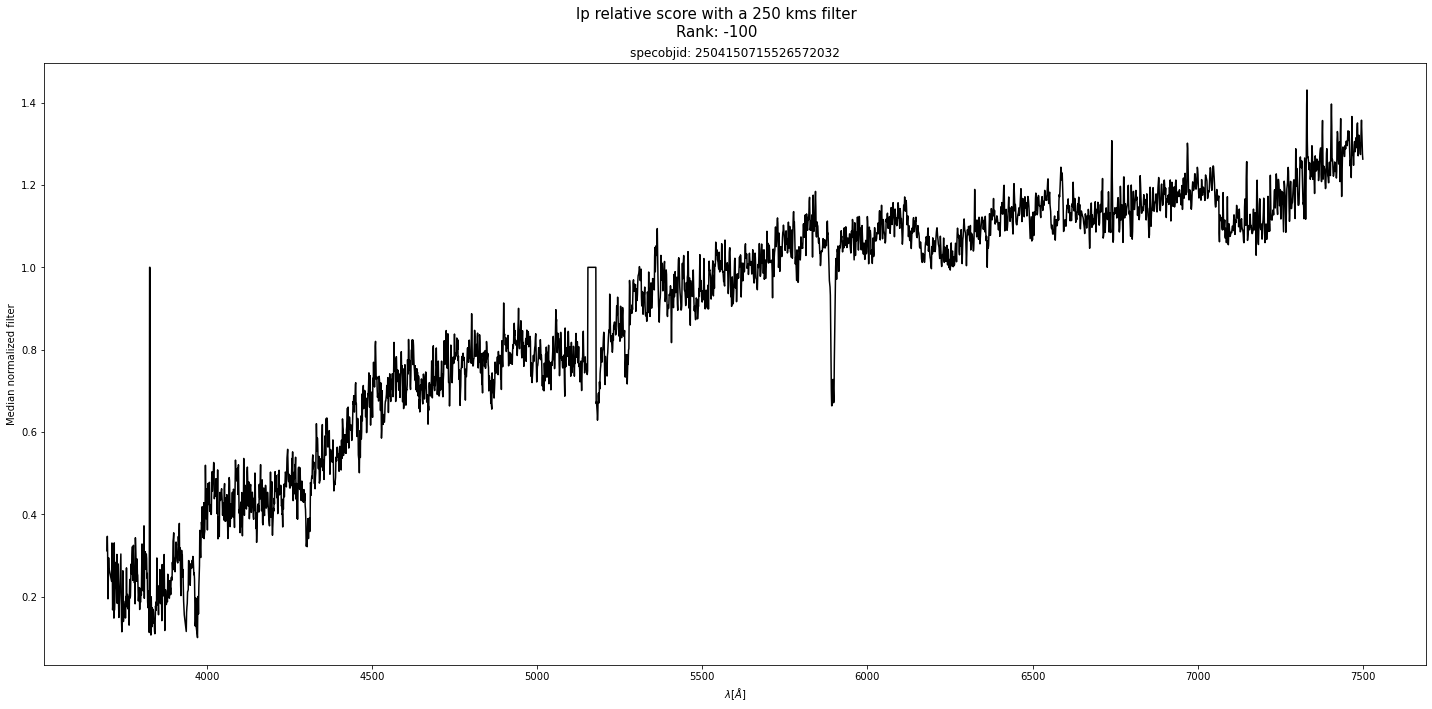

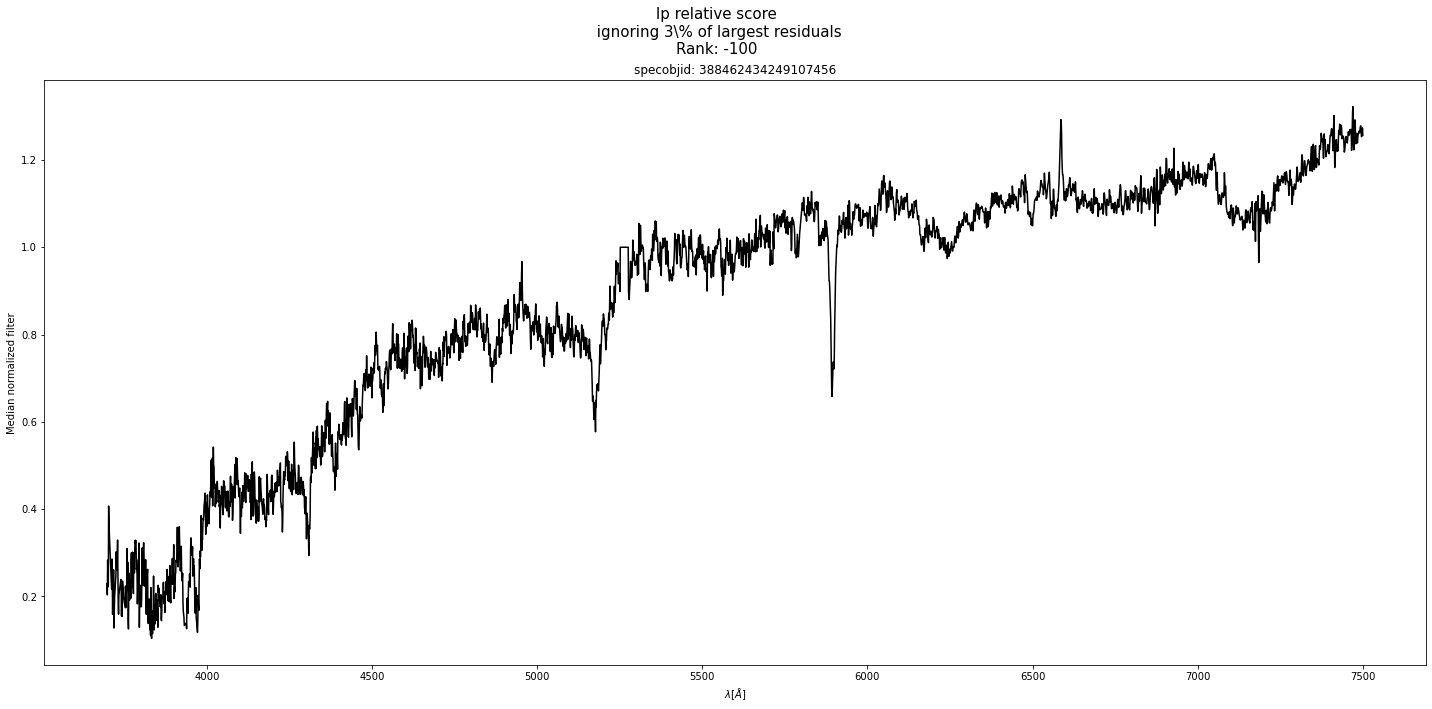

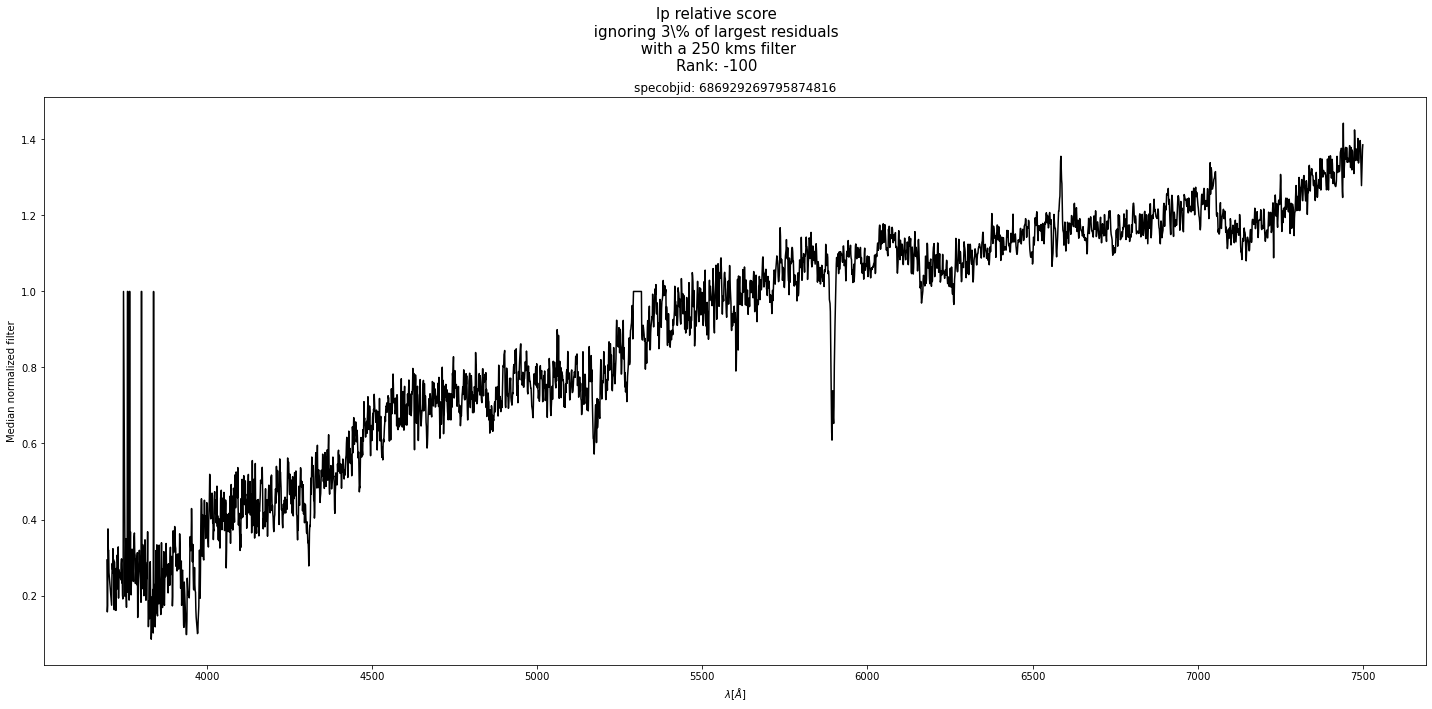

In [97]:
rank = -100
# metric = "cosine_filter_250kms"
save_to = "/home/edgar/explain-me-why/sections/figures/score/lunch"
for metric in scores_names.keys():
    specobjid = df_scores[metric].index[rank]

    fig, ax = plt.subplots(figsize=(20, 10), tight_layout=True)

    fig.suptitle(f"{scores_names[metric]}\nRank: {rank}", fontsize=15)
    ax.title.set_text(f"specobjid: {specobjid}")

    ax.set_xlabel("$\lambda [\AA]$")
    ax.set_ylabel("Median normalized filter")

    ax.plot(
        wave, scores[metric][rank],
        color="black", #label=f"specobjid: {specobjid}"
    )
    
    fig.savefig(f"{save_to}/{metric}.png")
    fig.savefig(f"{save_to}/{metric}.pdf")

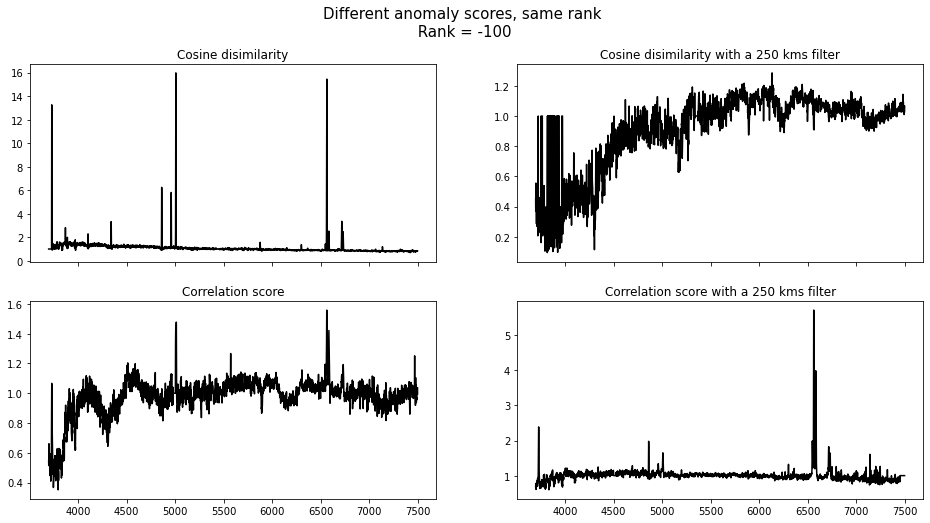

In [62]:
rank = -100
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(16, 8))
for ax_x in axs:
    for ax_y in ax_x:
        ax_y.clear()
# main title
fig.suptitle(f"Different anomaly scores, same rank\n Rank = {rank}", fontsize=15)
axs[0, 0].title.set_text("Cosine disimilarity")
axs[0, 0].plot(wave, cosine[rank], color="black", label=f"specobjid: {}")

axs[0, 1].title.set_text("Cosine disimilarity with a 250 kms filter")
axs[0, 1].plot(wave, cosine250[rank], color="black")

axs[1, 0].title.set_text("Correlation score")
axs[1, 0].plot(wave, correlation[rank], color="black")

axs[1, 1].title.set_text("Correlation score with a 250 kms filter")
axs[1, 1].plot(wave, correlation250[rank], color="black")

In [8]:
spectra = np.load(f"{meta_data_directory}/spectra.npy", mmap_mode="r")
ids = np.load(f"{meta_data_directory}/ids_inputting.npy")

In [16]:
def specobjid_to_idx(specobjid: int):
    mask = np.where(ids[:, 1]==specobjid, True, False)
    idx = int(ids[mask, 0][0])
    return idx
def compare(
    rank: int,
    df: pd.DataFrame,
    df_filter: pd.DataFrame
):
    # get specobjid of objects to compare
    df_id = df.index[rank] 
    df_filter_id = df_filter.index[rank]

    # get idx in traind data set to retrieve each spectrum 
    spectrum_idx = specobjid_to_idx(df_id)
    spectrum_filter_idx = specobjid_to_idx(df_filter_id)
    
    return spectrum_idx, spectrum_filter_idx 

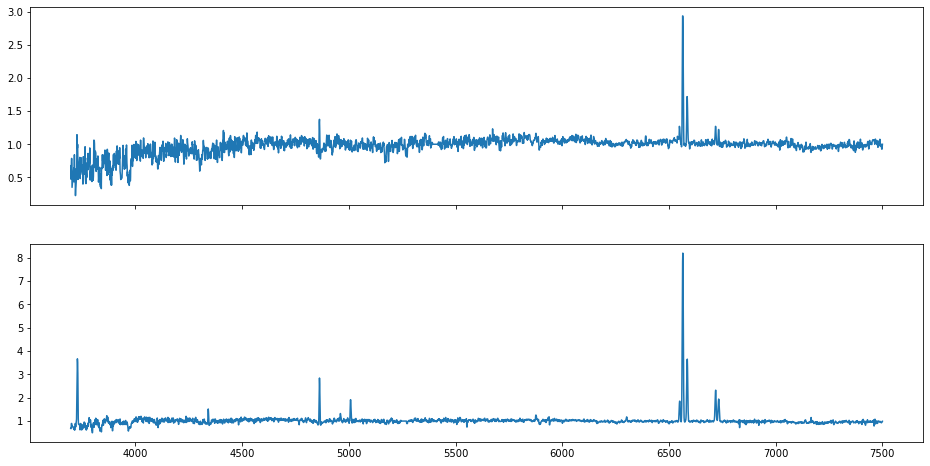

In [48]:
spectrum_idx, spectrum_filter_idx = compare(
    rank=-1000, df=df_correlation, df_filter=df_correlation250
)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 8))
for ax in axs: ax.clear()
axs[0].plot(wave, spectra[spectrum_idx])
axs[1].plot(wave, spectra[spectrum_filter_idx])


In [33]:
lp_noRel100 = np.load(f"{scores_directory}/lp_noRel100/top_anomalies.npy", mmap_mode="r")
lp_noRel97 = np.load(f"{scores_directory}/lp_noRel97/top_anomalies.npy", mmap_mode="r")
lp_filter_noRel100 = np.load(f"{scores_directory}/lp_filter_250kms_noRel100/top_anomalies.npy", mmap_mode="r")
lp_filter_noRel97 = np.load(f"{scores_directory}/lp_filter_250kms_noRel97/top_anomalies.npy", mmap_mode="r")

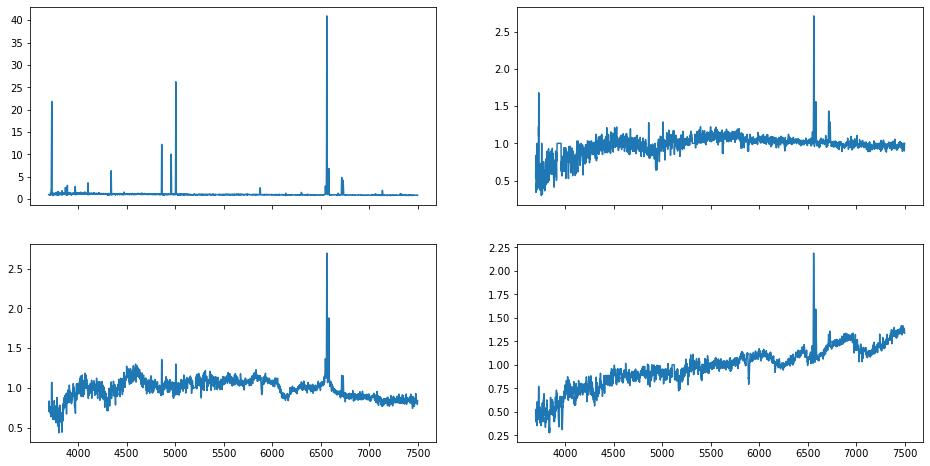

In [51]:
rank = -100
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(16, 8))
for ax_x in axs:
    for ax_y in ax_x:
        ax_y.clear()

axs[0, 0].plot(wave, lp_noRel100[rank])
axs[0, 1].plot(wave, lp_noRel97[rank])
axs[1, 0].plot(wave, lp_filter_noRel100[rank])
axs[1, 1].plot(wave, lp_filter_noRel97[rank])
